<a href="https://colab.research.google.com/github/prikshit-2000/Kanto-pokemon-Classification/blob/master/Pokemon_kanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
This code classify the three Pokemons (Pikachu,Bulbasaur,Charmander) 
"""

'\nThis code classify the three Pokemons (Pikachu,Bulbasaur,Charmander) \n'

In [2]:
import os
import zipfile
local_zip = '/Pokemon Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Pokemon Dataset')
zip_ref.close()

In [7]:
# Directory with our training Bulbasaur pictures
train_bulbasaur_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Bulbasaur')
# Directory with our training Charmander pictures
train_charmander_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Charmander')
# Directory with our training Pikachu pictures
train_pikachu_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Train/Pikachu')
# Directory with our Dev Bulbasaur pictures
validation_bulbasaur_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Dev/Bulbasaur')
# Directory with our Dev Charmander pictures
validation_charmander_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Dev/Charmander')
# Directory with our Dev Pikachu pictures
validation_pikachu_dir = os.path.join('/Pokemon Dataset/Pokemon Dataset/Dev/Pikachu')

In [8]:
train_bulbasaur_names = os.listdir(train_bulbasaur_dir)
print(train_bulbasaur_names[:10])

train_charmander_names = os.listdir(train_charmander_dir)
print(train_charmander_names[:10])

train_pikachu_names = os.listdir(train_pikachu_dir)
print(train_pikachu_names[:10])

validation_bulbasaur_names = os.listdir(validation_bulbasaur_dir)
print(validation_bulbasaur_names[:10])

validation_charmander_names = os.listdir(validation_charmander_dir)
print(validation_charmander_names[:10])

validation_pikachu_names = os.listdir(validation_pikachu_dir)
print(validation_pikachu_names[:10])

['416.jpg', '479.jpg', '471.jpg', '476.jpg', '441.jpg', '419.jpg', '423.jpg', '463.jpg', '485.jpg', '491.jpg']
['614.jpg', '558.jpg', '562.jpg', '563.jpg', '534.jpg', '613.jpg', '593.jpg', '610.jpg', '594.jpg', '523.jpg']
['316.jpg', '296.jpg', '362.jpg', '310.jpg', '330.jpg', '356.jpg', '381.jpg', '321.jpg', '361.jpg', '331.jpg']
['1101.jpg', '1127.jpg', '1117.jpg', '1114.jpg', '1140.jpg', '1132.jpg', '1123.jpg', '1106.jpg', '1128.jpg', '1119.jpg']
['2212.jpg', '2202.jpg', '2205.jpg', '2227.jpg', '2221.jpg', '2217.jpg', '2215.jpg', '2216.jpg', '2209.jpg', '2210.jpg']
['2006.jpg', '2013.jpg', '2026.jpg', '2000.jpg', '2037.jpg', '2031.jpg', '2025.jpg', '2030.jpg', '2021.jpg', '2039.jpg']


In [9]:
print('total training bulbasaur images:', len(os.listdir(train_bulbasaur_dir)))
print('total training charmander images:', len(os.listdir(train_charmander_dir)))
print('total training pikachu images:', len(os.listdir(train_pikachu_dir)))
print('total  validation bulbasaur images:', len(os.listdir(validation_bulbasaur_dir)))
print('total validation charmander images:', len(os.listdir(validation_charmander_dir)))
print('total validation pikachu images:', len(os.listdir(validation_pikachu_dir)))



total training bulbasaur images: 101
total training charmander images: 101
total training pikachu images: 101
total  validation bulbasaur images: 41
total validation charmander images: 41
total validation pikachu images: 41


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

ValueError: ignored

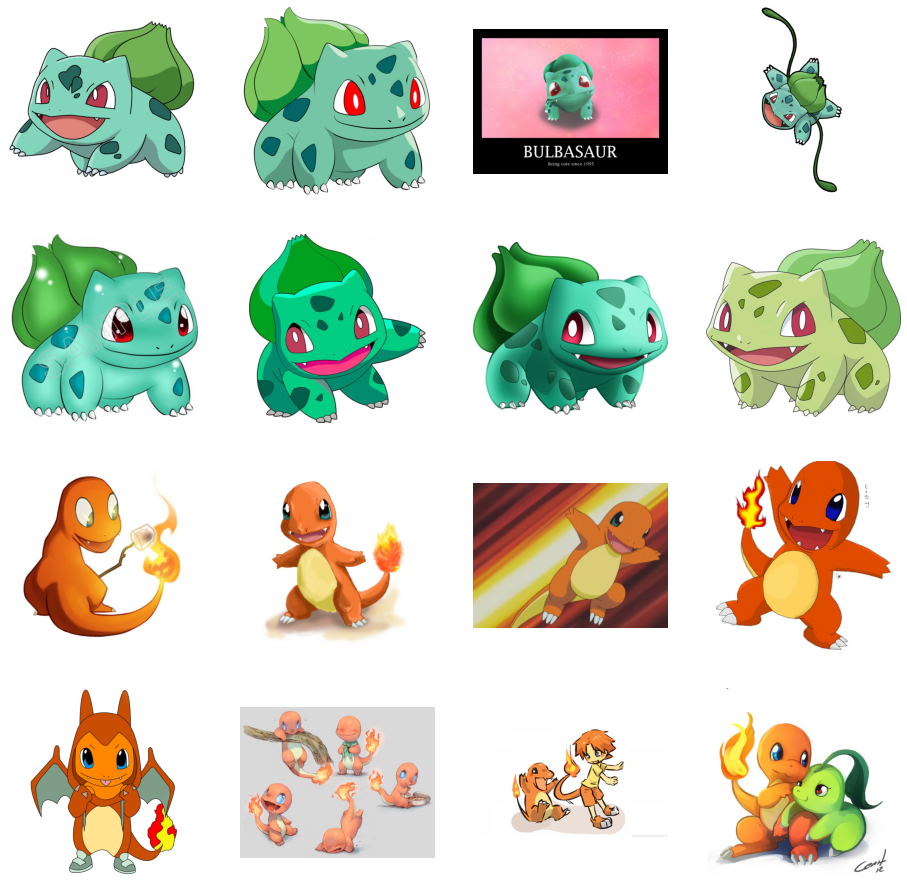

In [11]:
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_bulbasaur_pix = [os.path.join(train_bulbasaur_dir, fname) 
#                 for fname in train_bulbasaur_names[pic_index-8:pic_index]]
# next_charmander_pix = [os.path.join(train_charmander_dir, fname) 
#                 for fname in train_charmander_names[pic_index-8:pic_index]]
# next_pikachu_pix = [os.path.join(train_pikachu_dir, fname) 
#                 for fname in train_pikachu_names[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_bulbasaur_pix+next_charmander_pix+next_pikachu_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [12]:
import tensorflow as tf
import numpy as np

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/Pokemon Dataset/Pokemon Dataset/Train',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=128)
validation_generator = validation_datagen.flow_from_directory(
        '/Pokemon Dataset/Pokemon Dataset/Dev',  # This is the source directory validation images
        target_size=(300, 300),  
        batch_size=32,)

Found 303 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/25
2/2 [==============================] - 3s 2s/step - loss: 1.9153 - accuracy: 0.6914
Epoch 2/25
2/2 [==============================] - 4s 2s/step - loss: 0.3082 - accuracy: 0.8629
Epoch 3/25
2/2 [==============================] - 1s 686ms/step - loss: 0.1333 - accuracy: 0.9543
Epoch 4/25
2/2 [==============================] - 1s 658ms/step - loss: 0.0554 - accuracy: 1.0000
Epoch 5/25
2/2 [==============================] - 3s 2s/step - loss: 0.0293 - accuracy: 1.0000
Epoch 6/25
2/2 [==============================] - 4s 2s/step - loss: 0.0199 - accuracy: 1.0000
Epoch 7/25
2/2 [==============================] - 4s 2s/step - loss: 0.0132 - accuracy: 1.0000
Epoch 8/25
2/2 [==============================] - 4s 2s/step - loss: 0.0117 - accuracy: 1.0000
Epoch 9/25
2/2 [==============================] - 2s 790ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/25
2/2 [==============================] - 3s 2s/step - loss: 0.0070 - accuracy: 1.0000
Epoch 11/25
2/2 [=======================

Saving 2009.jpg to 2009.jpg
[2]
Pikachu


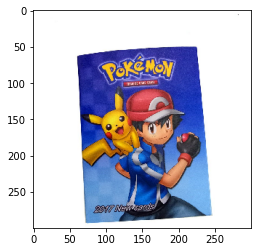

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  pred=np.argmax(classes,axis=1)
  print(pred)
  if pred==0:
    print("Bulbasaur")
  elif pred==1:
    print("Charmander")
  else:
    print("Pikachu")
  plt.imshow(img)
  plt.show()  

